In [84]:
# 모듈 호출
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd

In [85]:
data = pd.read_csv('./result_change.csv')
data.head()

,name,var,rate
0,01d1ad9a-7477-4d69-9a24-9e64a2d96eb7,0.317925,-0.28925
1,03f65249-8a7d-4bfe-845d-c70ae39d2c9f,2.027981,-1.74375
2,06434818-6953-44c5-87a3-890f7676d7ab,0.640090,0.45350
3,0744bc3d-fb06-48f3-85f4-89af0b24dc0d,2.013322,-0.45975
4,0e409b44-467b-4169-8629-b7c1d7439609,1.497575,-3.66125


In [86]:
#fm._rebuild()
#[(f.name, f.fname) for f in fm.fontManager.ttflist if 'KoPub' in f.name] # 폰트 검색

In [87]:
sns.set(style='whitegrid', font='KoPubDotum Medium', font_scale=1.2)  # Seaborn 설정

In [88]:
X = data.iloc[:, [1,2]].values
X.shape
m = X.shape[0] # 227
n = X.shape[1] # 2

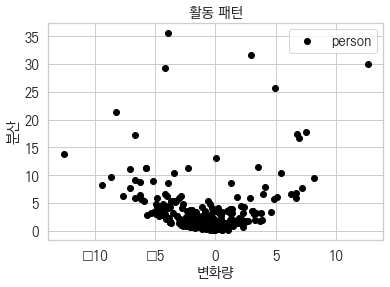

In [90]:
plt.scatter(X[:,1],X[:,0],c='black',label='person')
plt.ylabel('분산')
plt.xlabel('변화량')
plt.legend()
plt.title('활동 패턴')
plt.show()

In [130]:
K=4 # 클러스터 개수
n_iter=100 # 반복 횟수

Centroids=np.array([]).reshape(n,0) # 클러스터 중심 초기화
Centroids # shape=(2, 0)

array([], shape=(2, 0), dtype=float64)

In [131]:
for i in range(K): # 0, 1, 2
    rand=rd.randint(0,m-1) # 0과 21 사이 난수 생성
    Centroids=np.c_[Centroids,X[rand]] # 클러스터 중심(열) 추가
Centroids # K개 클러스터 중심 초기값. shape=(2, 3)

Output={} # 출력값 초기화(딕셔너리)

In [132]:
# 유클리드 거리 초기화
EuclidianDistance=np.array([]).reshape(m,0)
EuclidianDistance # shape=(227, 0)

array([], shape=(227, 0), dtype=float64)

In [133]:
Centroids[:,0] # shape=(227,)
# 넘파이 브로드캐스트(broadcast): 형상이 다른 배열끼리도 계산 가능
# (227, 2) 행렬 A에서 (2,) 벡터 값을 차감하면, 벡터 값은 (227, 2) 행렬로 확대된 후 연산
tempDist = np.sum((X-Centroids[:,0])**2,axis=1)
tempDist # shape=(227,)

array([2.17284098e+01, 2.56727008e+01, 1.52883552e+01, 1.49304093e+01,
       4.97833321e+01, 4.23049403e+01, 1.96918263e+01, 5.36729572e+01,
       2.32089111e+00, 3.00949816e+01, 8.95579264e+01, 1.70775679e+01,
       1.02561028e+01, 8.78351882e+00, 2.70541448e+01, 1.86059931e+01,
       1.60111189e+01, 1.71713694e+01, 3.74454134e+00, 1.87793090e+01,
       1.43486766e+01, 2.75960901e+01, 1.99450047e+01, 4.47258283e+02,
       2.31865619e+01, 8.62887005e+00, 7.95789726e+02, 2.17693204e+01,
       5.74925505e+01, 5.07684720e+01, 1.86056424e+01, 2.38788561e+01,
       2.46408509e+01, 2.16324022e+01, 4.02822097e+01, 2.95212846e+00,
       6.40552075e+01, 2.99284657e+01, 1.69159124e+01, 4.05829448e+01,
       2.37851517e+01, 2.74287175e+01, 5.57931887e+01, 1.22492367e+02,
       4.04184283e+01, 1.15506648e+01, 3.02509363e+00, 4.12932859e+01,
       1.99148928e+00, 1.14973201e+02, 1.55368748e+01, 7.79493874e+01,
       8.29874629e+00, 2.65659072e+01, 2.40525426e+01, 5.09305615e+00,
      

In [134]:
np.c_[EuclidianDistance,tempDist] # (227, 0) 행렬에 (227,) 옆으로 붙이기

array([[2.17284098e+01],
       [2.56727008e+01],
       [1.52883552e+01],
       [1.49304093e+01],
       [4.97833321e+01],
       [4.23049403e+01],
       [1.96918263e+01],
       [5.36729572e+01],
       [2.32089111e+00],
       [3.00949816e+01],
       [8.95579264e+01],
       [1.70775679e+01],
       [1.02561028e+01],
       [8.78351882e+00],
       [2.70541448e+01],
       [1.86059931e+01],
       [1.60111189e+01],
       [1.71713694e+01],
       [3.74454134e+00],
       [1.87793090e+01],
       [1.43486766e+01],
       [2.75960901e+01],
       [1.99450047e+01],
       [4.47258283e+02],
       [2.31865619e+01],
       [8.62887005e+00],
       [7.95789726e+02],
       [2.17693204e+01],
       [5.74925505e+01],
       [5.07684720e+01],
       [1.86056424e+01],
       [2.38788561e+01],
       [2.46408509e+01],
       [2.16324022e+01],
       [4.02822097e+01],
       [2.95212846e+00],
       [6.40552075e+01],
       [2.99284657e+01],
       [1.69159124e+01],
       [4.05829448e+01],


In [135]:
for k in range(K): # 0, 1, 2
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
EuclidianDistance # shape=(227, 3)

array([[2.17284098e+01, 6.38633092e-01, 1.36911659e+01, 8.81110685e-01],
       [2.56727008e+01, 8.22723036e+00, 4.21030283e+00, 7.10156680e+00],
       [1.52883552e+01, 1.55062493e-01, 1.86567156e+01, 1.67608348e-02],
       [1.49304093e+01, 4.04404668e+00, 1.10094360e+01, 2.77625595e+00],
       [4.97833321e+01, 1.89308484e+01, 2.27801083e-02, 1.85161449e+01],
       [4.23049403e+01, 1.39397946e+01, 5.49393143e-01, 1.35464681e+01],
       [1.96918263e+01, 2.48871989e+00, 9.37683599e+00, 1.94194609e+00],
       [5.36729572e+01, 3.00331851e+01, 2.22643419e+00, 2.82951945e+01],
       [2.32089111e+00, 2.69364939e+01, 7.33411314e+01, 2.37864762e+01],
       [3.00949816e+01, 1.94982948e+01, 5.74345157e+00, 1.70444399e+01],
       [8.95579264e+01, 1.18184074e+02, 7.71248971e+01, 1.09707363e+02],
       [1.70775679e+01, 1.85688118e-03, 2.02907067e+01, 1.86025649e-01],
       [1.02561028e+01, 5.43857632e+01, 9.78392377e+01, 4.88308635e+01],
       [8.78351882e+00, 3.74439012e+00, 1.80189139e

In [136]:
# 유클리드 거리가 최소가 되는 색인
np.argmin(EuclidianDistance,axis=1)

# K 클러스터 저장
C=np.argmin(EuclidianDistance,axis=1)+1
C # shape=(227,)

array([2, 3, 4, 4, 3, 3, 4, 3, 1, 3, 3, 2, 1, 4, 2, 4, 4, 4, 1, 4, 4, 3,
       2, 3, 2, 1, 1, 2, 3, 3, 4, 4, 2, 2, 3, 1, 3, 3, 4, 3, 4, 3, 3, 3,
       3, 4, 1, 3, 1, 3, 4, 3, 4, 4, 4, 4, 1, 4, 2, 3, 3, 4, 3, 2, 4, 1,
       3, 4, 4, 3, 1, 4, 4, 4, 3, 1, 3, 3, 1, 3, 1, 3, 3, 2, 3, 3, 4, 1,
       3, 4, 2, 3, 3, 4, 4, 3, 3, 1, 3, 3, 1, 4, 1, 3, 3, 1, 4, 3, 3, 4,
       4, 4, 4, 3, 4, 4, 1, 4, 1, 3, 3, 3, 3, 3, 2, 1, 3, 1, 3, 3, 2, 2,
       3, 1, 4, 1, 4, 1, 1, 3, 1, 4, 1, 3, 1, 3, 3, 3, 4, 4, 3, 4, 1, 1,
       1, 3, 3, 1, 1, 1, 4, 3, 3, 1, 3, 1, 3, 4, 3, 1, 1, 3, 1, 3, 4, 3,
       4, 3, 4, 1, 3, 4, 4, 1, 3, 3, 3, 3, 1, 1, 4, 1, 3, 4, 3, 3, 4, 1,
       3, 3, 3, 4, 3, 1, 2, 4, 3, 4, 1, 3, 1, 4, 1, 3, 3, 3, 3, 1, 3, 4,
       4, 3, 3, 3, 1, 4, 3], dtype=int64)

In [137]:
Y={} # 출력값 임시 딕셔너리

for k in range(K): # 0, 1, 2
    Y[k+1]=np.array([]).reshape(2,0) # 특징 개수
Y

{1: array([], shape=(2, 0), dtype=float64),
 2: array([], shape=(2, 0), dtype=float64),
 3: array([], shape=(2, 0), dtype=float64),
 4: array([], shape=(2, 0), dtype=float64)}

In [138]:
# 출력값 임시 딕셔너리: 키 값에 대한 재귀적 갱신
for i in range(m): # m=22
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
Y

{1: array([[ 3.41730443,  6.01533747,  3.9439915 ,  4.15940318, 30.05261892,
          2.05612937,  3.15566592,  4.56030911,  4.93373799,  3.51973057,
          6.79974519,  1.6672001 ,  3.94101689, 29.2714067 ,  1.97988443,
          1.80511318,  2.36118685,  5.90373829,  7.63764316,  6.55536429,
          3.55188176,  5.71153471, 16.74512328,  3.15029707,  3.60764268,
          6.03334703, 25.77732489,  4.15627302, 17.48103422, 17.72077767,
          3.67307303, 35.61639019,  2.00644769,  7.84353245,  1.80815232,
          3.37603958, 11.54322551,  5.85570262,  4.29942755,  5.44239692,
          3.15330187,  3.11456273, 13.17199514,  3.72256632,  3.23761381,
         11.24221193,  9.44107069,  8.69373641, 31.55671605,  6.72323482,
         10.32733242,  3.20902778,  1.71172903],
        [ 4.6185    ,  5.1055    ,  1.2105    ,  0.2315    , 12.6795    ,
          2.1985    ,  1.39775   ,  2.14525   , -0.48      ,  3.0985    ,
          6.70525   ,  2.468     ,  1.35425   , -4.21175   ,

In [139]:
# 출력값 임시 디렉터리: 전치행렬
for k in range(K): # 0, 1, 2
    Y[k+1]=Y[k+1].T
Y

{1: array([[ 3.41730443,  4.6185    ],
        [ 6.01533747,  5.1055    ],
        [ 3.9439915 ,  1.2105    ],
        [ 4.15940318,  0.2315    ],
        [30.05261892, 12.6795    ],
        [ 2.05612937,  2.1985    ],
        [ 3.15566592,  1.39775   ],
        [ 4.56030911,  2.14525   ],
        [ 4.93373799, -0.48      ],
        [ 3.51973057,  3.0985    ],
        [ 6.79974519,  6.70525   ],
        [ 1.6672001 ,  2.468     ],
        [ 3.94101689,  1.35425   ],
        [29.2714067 , -4.21175   ],
        [ 1.97988443,  3.2535    ],
        [ 1.80511318,  3.67575   ],
        [ 2.36118685,  1.97475   ],
        [ 5.90373829,  2.88375   ],
        [ 7.63764316,  7.19425   ],
        [ 6.55536429,  3.96175   ],
        [ 3.55188176,  3.02675   ],
        [ 5.71153471,  4.8875    ],
        [16.74512328,  6.91975   ],
        [ 3.15029707,  1.22425   ],
        [ 3.60764268,  0.933     ],
        [ 6.03334703,  1.7905    ],
        [25.77732489,  4.9865    ],
        [ 4.15627302, -0.

In [140]:
for i in range(n_iter): # n_iter 반복 횟수
    # 유클리드 거리가 최소가 되는 K 클러스터 할당
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1) # shape=(22,)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist] # shape=(22, 3)
    C=np.argmin(EuclidianDistance,axis=1)+1 # shape=(22,)
    # K 클러스터 갱신
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0) # Y 딕셔너리 키, 값 할당
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]] # Y 딕셔너리 키(K클러스터), 값(육지면적, 탐방객수) 할당
    for k in range(K):
        Y[k+1]=Y[k+1].T # 전치행렬
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0) # K 클러스터 중심 갱신
    Output=Y

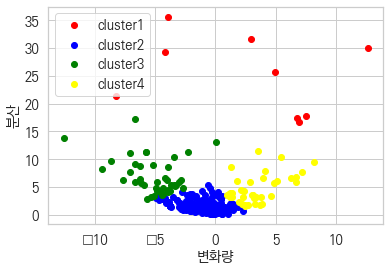

In [141]:
# K-평균 클러스터링 결과 가시화
color=['red','blue','green', 'yellow']
labels=['cluster1','cluster2','cluster3', 'cluster4']
for k in range(K):
    plt.scatter(Output[k+1][:,1],Output[k+1][:,0],c=color[k],label=labels[k])
#plt.scatter(Centroids[0,:],Centroids[1,:],s=200,c='pink',label='Centroids')
plt.ylabel('분산')
plt.xlabel('변화량')
plt.legend()
plt.show()